# 1
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

Описание данных

user_data:

    client – идентификатор пользователя
    premium – является ли клиент премиальным
    age – возраст

logs:

    client – идентификатор пользователя
    success – результат (успех – 1, нет – 0)
    platform – платформа
    time – время в формате Unix


In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [19]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [20]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [23]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [24]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [25]:
logs.platform.nunique()

3

# 2
Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

12, 123, 456

In [44]:
max_df = logs.groupby('client').agg({'success':'sum'})
max_index = max_df.success.max()
max_index 

41

In [47]:
max_df.loc[max_df.success==max_index].index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

# 3
С какой платформы было совершено наибольшее количество успешных операций?

In [73]:
 logs.loc[logs.success==True].platform.value_counts().index[0]

'phone'

# 4
Какая платформа наиболее популярна среди премиумных клиентов?

In [75]:
df = user_data.merge(logs)
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [78]:
df.loc[df.premium==True].platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

# 5
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

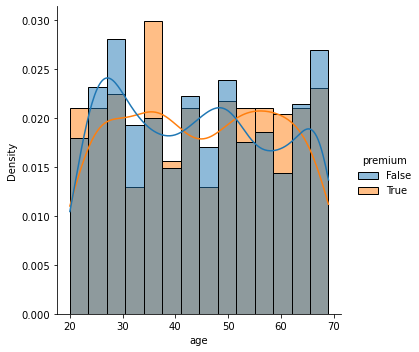

In [90]:
sns.displot(data=df, x='age', hue='premium', kde=True, kind ='hist', stat='density', common_norm=False, bins=14)

# 6
Постройте график распределения числа успешных операций: 

    x – число успешных операций
    y – число клиентов, совершивших такое количество успешных операций


In [97]:
df2 = df.groupby(['client'],as_index=False).agg({'success':'sum'})
df2

,client,success
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1
...,...,...
2949,99926,1
2950,99927,1
2951,99931,1
2952,99952,0


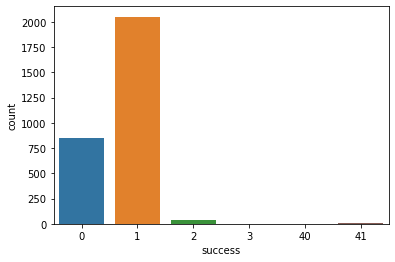

In [108]:
ax = sns.countplot(x='success',data=df2)

# 7
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Полезные ссылки:

    sns.countplot – документация к типу графика
    figsize – про размер графиков

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [114]:
df_success_computer = df.loc[df.platform=='computer']
df_success_computer

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
23,74867,True,27,False,computer,1585452086
...,...,...,...,...,...,...
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079
3430,61851,False,31,True,computer,1585473042


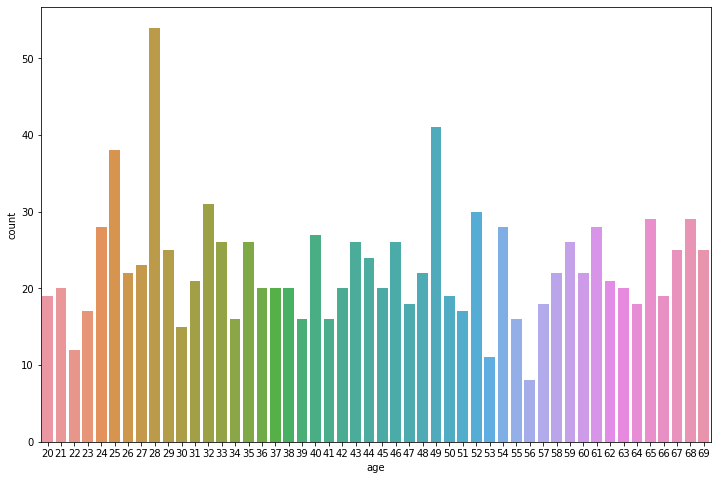

In [118]:
 plt.figure(figsize=(12, 8))
ax2 = sns.countplot(data=df_success_computer, x='age')
